In [136]:
# ! pip install ultralytics
# ! pip install pycocotools

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
names = {0:"door",1:"cabinetDoor",2:"refrigeratorDoor",3:"window",4:"chair",5:"table", 6:"cabinet",7:"couch",8:"openedDoor",9:"pole"}
COLORS = np.random.uniform(0,255,(10,3))

In [197]:
import pycocotools
from ultralytics import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import yaml
import torch
import shutil
import wandb


In [263]:
root_dir="archive"
train_imgs_dir="archive/train/images"
valid_imgs_dir="archive/test/images"
test_imgs_dir="archive/test2/images"
train_labels_dir="archive/train/labels"
valid_labels_dir="archive/test/labels"
test_labels_dir="archive/test2/labels"

In [264]:
names={0:"door",1:"cabinetDoor",2:"refrigeratorDoor",3:"window",4:"chair",5:"table",
       6:"cabinet",7:"couch",8:"openedDoor",9:"pole"}
COLORS=np.random.uniform(0,255,(10,3))

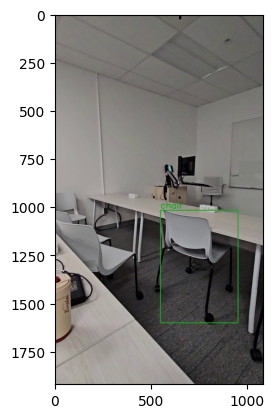

In [334]:
show_bbox("sample.jpg","archive/live_test/images","archive/live_test/images/")

In [285]:
def show_bbox(img_name,img_dir,label_dir):
    img_path=os.path.join(img_dir,img_name)
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    h,w,_=img.shape
    img=img.copy()
    
    try:
        label_path=os.path.join(label_dir,img_name[:-4]+".txt")
        label=pd.read_csv(label_path,sep=" ",header=None).values
        classes=label[:,0]
        boxes=label[:,1:]
        
        for i,box in enumerate(boxes):
            cls_id=int(classes[i])
            text=names[cls_id]
            color=COLORS[cls_id]
            xmin=int((box[0]-box[2]/2)*w)
            ymin=int((box[1]-box[3]/2)*h)
            xmax=int((box[0]+box[2]/2)*w)
            ymax=int((box[1]+box[3]/2)*h)
            cv2.rectangle(img,(xmin,ymin),(xmax,ymax),color,3)
            y=ymin-10 if ymin-10>10 else ymin+20
            cv2.putText(img,text,(xmin,y),cv2.FONT_HERSHEY_SIMPLEX,1.5,color,3)
    except:
        pass
    
    # axis.imshow(img)
    # axis.axis("off")
    plt.imshow(img)

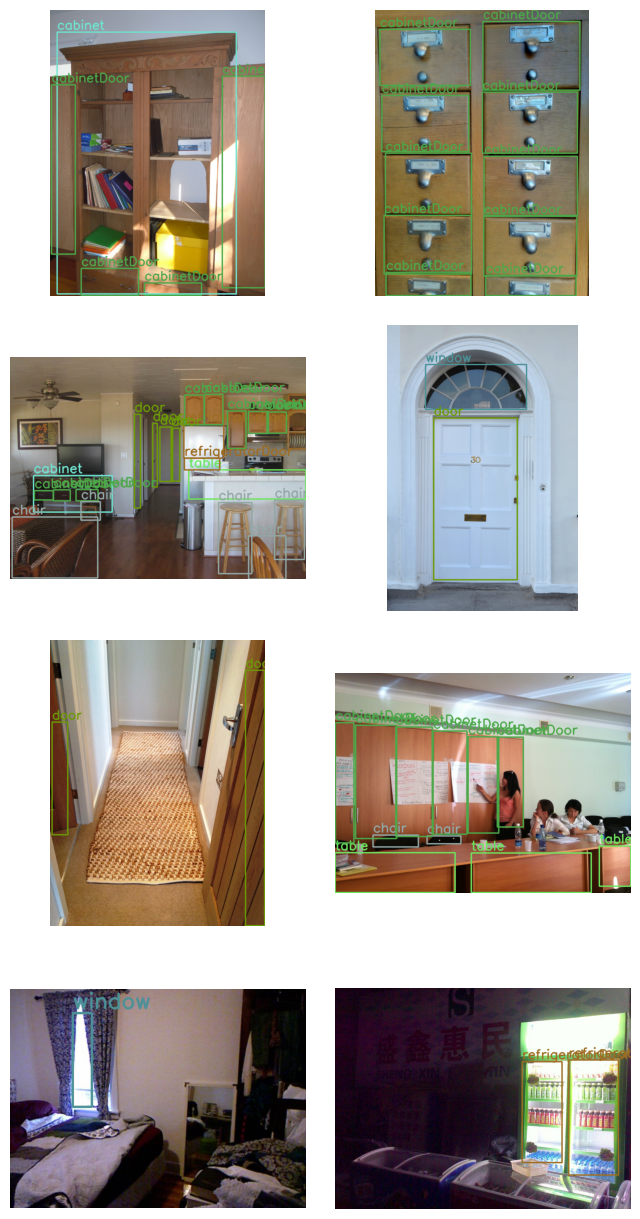

In [232]:
fig,axes=plt.subplots(4,2,figsize=(8,16))
plt.subplots_adjust(wspace=0.1,hspace=0.1)
ax=axes.flatten()


train_img_list=sorted(os.listdir(train_imgs_dir))
img_name_list=np.random.choice(train_img_list,8)


for i,img_name in enumerate(img_name_list):
    show_bbox(img_name,train_imgs_dir,train_labels_dir,ax[i])

In [236]:
yolo_format=dict(path=root_dir,
                 train=train_imgs_dir,
                 val=valid_imgs_dir,
                 nc=10,
                 names=names)
             
with open('archive/yolo.yaml', 'w') as outfile:
    yaml.dump(yolo_format, outfile, default_flow_style=False)

In [237]:
import wandb
wandb.login(key="031db24fdc8918141763b6040d3d0a08fdf7bbe6" )

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\d4rsh\.netrc


True

In [242]:
model=YOLO('yolov8l.pt')
model.train(data="C:/Users/d4rsh/Downloads/agile od dataset/archive/yolo.yaml",epochs=150,patience=20,batch=8,lr0=0.0003,imgsz=640,freeze=6)

Ultralytics YOLOv8.1.35 🚀 Python-3.11.7 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolov8l.pt, data=C:/Users/d4rsh/Downloads/agile od dataset/archive/yolo.yaml, epochs=150, time=None, patience=20, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=6, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

train: Scanning C:\Users\d4rsh\Downloads\agile od dataset\archive\train\labels.cache... 1008 images, 120 backgrounds, 0 corrupt: 100%|██████████| 1012/1012 [00:00<?, ?it/s]
val: Scanning C:\Users\d4rsh\Downloads\agile od dataset\archive\test\labels... 104 images, 3 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:01<00:00, 79.04it/s]


val: New cache created: C:\Users\d4rsh\Downloads\agile od dataset\archive\test\labels.cache
Plotting labels to runs\detect\train11\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0003' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train11
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      3.49G      1.583      2.527      1.498         24        640: 100%|██████████| 127/127 [01:56<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        107        550      0.168      0.256     0.0605     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      3.72G      1.494      1.956      1.456         38        640: 100%|██████████| 127/127 [01:47<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        107        550      0.343      0.227     0.0863      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      3.52G      1.543      1.969      1.514         30        640: 100%|██████████| 127/127 [01:56<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        107        550      0.481      0.233      0.135     0.0615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      3.72G      1.533      1.836      1.487         46        640: 100%|██████████| 127/127 [01:24<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        107        550      0.575      0.181      0.123     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      3.63G      1.526      1.735      1.476         25        640: 100%|██████████| 127/127 [01:16<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        107        550      0.417      0.285      0.172     0.0817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      3.62G      1.469      1.684      1.453         27        640: 100%|██████████| 127/127 [00:53<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        107        550      0.439      0.291       0.21      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150       3.6G      1.437      1.564       1.42         56        640: 100%|██████████| 127/127 [00:54<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        107        550       0.44      0.216      0.222      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      3.88G      1.433      1.576      1.439         58        640: 100%|██████████| 127/127 [00:55<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        107        550      0.427      0.305      0.196      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      3.73G      1.416      1.495      1.405         52        640: 100%|██████████| 127/127 [00:55<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        107        550      0.431      0.304      0.238      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150       3.7G      1.386      1.495      1.404         32        640: 100%|██████████| 127/127 [01:30<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        107        550      0.508      0.316      0.281       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      3.68G      1.378      1.403      1.386         88        640: 100%|██████████| 127/127 [01:30<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        107        550      0.604      0.285      0.302      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150       3.5G      1.367      1.376       1.37         78        640: 100%|██████████| 127/127 [01:16<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        107        550      0.509       0.29      0.229      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150       3.5G      1.348      1.361      1.369         47        640: 100%|██████████| 127/127 [01:29<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

                   all        107        550      0.254      0.388      0.317      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      3.57G      1.319      1.309      1.353         76        640: 100%|██████████| 127/127 [01:30<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        107        550      0.534      0.315      0.315       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      3.71G      1.297      1.247      1.354         29        640: 100%|██████████| 127/127 [01:10<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        107        550      0.626      0.255      0.313      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      3.54G      1.303       1.25       1.35         42        640: 100%|██████████| 127/127 [00:51<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        107        550      0.637      0.274      0.328      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      3.54G      1.292      1.211      1.348         24        640: 100%|██████████| 127/127 [00:53<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        107        550      0.497       0.35      0.298      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      3.66G      1.281      1.221      1.339         37        640: 100%|██████████| 127/127 [00:52<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        107        550      0.512      0.308      0.283      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.73G       1.28      1.148      1.317         23        640: 100%|██████████| 127/127 [00:51<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        107        550      0.544      0.286       0.31      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      3.52G      1.219      1.109      1.292         17        640: 100%|██████████| 127/127 [00:52<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        107        550      0.629      0.269      0.352      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      3.52G      1.235      1.096      1.302         32        640: 100%|██████████| 127/127 [00:50<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        107        550      0.481       0.35      0.373      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      3.85G      1.206      1.083      1.276         30        640: 100%|██████████| 127/127 [00:50<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        107        550      0.476      0.328      0.313      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      3.52G      1.218      1.077      1.298         43        640: 100%|██████████| 127/127 [00:51<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        107        550      0.557      0.337      0.343      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      3.53G      1.188      1.031      1.275         20        640: 100%|██████████| 127/127 [00:50<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        107        550      0.575      0.277      0.321      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      3.51G      1.197      1.037      1.277         33        640: 100%|██████████| 127/127 [00:51<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        107        550      0.475      0.353      0.318      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      3.72G      1.189      1.017      1.267         33        640: 100%|██████████| 127/127 [00:50<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.33it/s]

                   all        107        550       0.37      0.389      0.297      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      3.75G      1.168     0.9778       1.26         35        640: 100%|██████████| 127/127 [00:51<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        107        550      0.426      0.382      0.323      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      3.69G      1.145     0.9767      1.249         52        640: 100%|██████████| 127/127 [00:51<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        107        550      0.678      0.274      0.358      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150       3.7G      1.154     0.9457      1.243         30        640: 100%|██████████| 127/127 [00:51<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        107        550      0.379      0.374       0.37      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      3.65G      1.119     0.9146      1.238         30        640: 100%|██████████| 127/127 [00:50<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        107        550      0.328      0.387      0.317      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      3.71G      1.116     0.9115      1.227         27        640: 100%|██████████| 127/127 [01:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        107        550      0.504      0.325      0.355      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      3.53G      1.097     0.8746      1.223         24        640: 100%|██████████| 127/127 [01:29<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        107        550      0.435      0.444      0.389      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      3.51G       1.12     0.8813      1.232         62        640: 100%|██████████| 127/127 [01:18<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        107        550      0.415       0.38      0.319      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      3.66G      1.089     0.8571      1.214         43        640: 100%|██████████| 127/127 [00:52<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        107        550      0.405      0.376      0.332      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      3.61G      1.072     0.8108      1.198         44        640: 100%|██████████| 127/127 [00:51<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        107        550      0.388      0.402      0.319      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      3.82G      1.067     0.8364        1.2         58        640: 100%|██████████| 127/127 [00:52<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        107        550      0.325      0.419      0.387      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      3.72G      1.056     0.8132      1.182         51        640: 100%|██████████| 127/127 [00:51<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]

                   all        107        550      0.325      0.392      0.338      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      3.71G      1.041     0.8059      1.181         35        640: 100%|██████████| 127/127 [00:51<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]

                   all        107        550      0.431      0.344      0.331       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      3.52G      1.035     0.8031      1.182         31        640: 100%|██████████| 127/127 [00:47<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        107        550      0.327      0.381      0.308      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      3.72G      1.027     0.7739      1.168         90        640: 100%|██████████| 127/127 [00:50<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]

                   all        107        550      0.365      0.371      0.314      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      3.53G      1.037     0.7679      1.185         46        640: 100%|██████████| 127/127 [00:50<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        107        550      0.481      0.261      0.284      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      3.73G      1.024     0.7765      1.172         51        640: 100%|██████████| 127/127 [00:51<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        107        550      0.462      0.344      0.347        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      3.71G      1.003     0.7461       1.16         42        640: 100%|██████████| 127/127 [00:51<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]

                   all        107        550      0.363      0.399      0.277      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      3.67G      0.992     0.7475      1.153         22        640: 100%|██████████| 127/127 [00:51<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        107        550      0.391      0.365      0.343      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      3.67G      0.986     0.7248      1.146         47        640: 100%|██████████| 127/127 [00:52<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        107        550      0.477      0.343       0.34      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      3.53G      1.008     0.7233       1.16         37        640: 100%|██████████| 127/127 [00:50<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]

                   all        107        550        0.4      0.413      0.379      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      3.54G     0.9582     0.7045      1.134         46        640: 100%|██████████| 127/127 [01:15<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        107        550      0.416      0.305      0.319      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      3.88G     0.9661     0.7005      1.135         68        640: 100%|██████████| 127/127 [01:30<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        107        550      0.308       0.42      0.305      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      3.53G     0.9622     0.6994      1.138         19        640: 100%|██████████| 127/127 [01:31<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]

                   all        107        550       0.37      0.381      0.326      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      3.75G     0.9364     0.6803      1.121         54        640: 100%|██████████| 127/127 [01:31<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]

                   all        107        550      0.427      0.356       0.34      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150       3.7G     0.9208     0.6584      1.114         50        640: 100%|██████████| 127/127 [01:29<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        107        550      0.484      0.355      0.367      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      3.55G     0.9299     0.6654      1.114         41        640: 100%|██████████| 127/127 [01:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

                   all        107        550      0.404      0.366      0.345      0.196
Stopping training early as no improvement observed in last 20 epochs. Best results observed at epoch 32, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



52 epochs completed in 1.029 hours.
Optimizer stripped from runs\detect\train11\weights\last.pt, 87.7MB
Optimizer stripped from runs\detect\train11\weights\best.pt, 87.6MB

Validating runs\detect\train11\weights\best.pt...
Ultralytics YOLOv8.1.35 🚀 Python-3.11.7 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 268 layers, 43614318 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


                   all        107        550      0.436      0.443      0.389      0.225
                  door        107         34      0.327      0.559        0.4      0.238
           cabinetDoor        107        179      0.484      0.542      0.458      0.188
      refrigeratorDoor        107          2      0.359          1      0.995      0.796
                window        107         63      0.561      0.556      0.516      0.285
                 chair        107         87      0.299      0.379       0.29      0.136
                 table        107         47      0.125      0.511      0.192     0.0817
               cabinet        107         52      0.519      0.212      0.248      0.166
                 couch        107         58      0.291      0.224      0.161     0.0752
            openedDoor        107         20      0.775        0.2      0.289     0.0988
                  pole        107          8       0.62       0.25      0.344      0.189
Speed: 0.1ms preproce

lr/pg0,▁▅███████▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅
lr/pg1,▁▅███████▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅
lr/pg2,▁▅███████▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅
metrics/mAP50(B),▁▂▃▂▄▄▄▆▆▅▆▆▇▆▆▇█▇▇▆▇▇█▇█▆▇█▇▇▆▆▇▇▇█▆▇▇█
metrics/mAP50-95(B),▁▂▂▂▄▄▄▅▆▄▆▆▆▆▆▇▇▇▇▆▆▇▇██▇▆█▇▇▆▆▇▇▇█▇▇▇█
metrics/precision(B),▁▃▅▇▅▅▅▆▇▆▆▇▇▆▆▇▅▆▇▅▅█▄▆▅▄▄▃▃▅▄▅▅▄▅▄▃▄▅▅
metrics/recall(B),▃▂▂▁▄▂▄▅▄▄▅▃▃▄▄▃▆▅▄▆▆▃▆▅█▆▇▇▇▅▆▃▅▆▅▇▇▆▆█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇█▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000013662C1E750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,   

In [246]:
path_best_weights="runs/detect/train11/weights/best.pt"
model = YOLO(path_best_weights) 

metrics = model.val(conf=0.20,iou=0.70)

Ultralytics YOLOv8.1.35 🚀 Python-3.11.7 torch-2.2.1 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)


val: Scanning C:\Users\d4rsh\Downloads\agile od dataset\archive\test\labels.cache... 104 images, 3 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:19<00:00,  2.77s/it]


                   all        107        550      0.438      0.395      0.436      0.269
                  door        107         34       0.37        0.5      0.457      0.283
           cabinetDoor        107        179      0.525      0.531      0.515      0.238
      refrigeratorDoor        107          2        0.4          1      0.995      0.796
                window        107         63      0.604      0.508      0.504      0.311
                 chair        107         87      0.344      0.356      0.363      0.188
                 table        107         47      0.134      0.447      0.205     0.0947
               cabinet        107         52      0.529      0.173      0.351      0.269
                 couch        107         58      0.308      0.207      0.231      0.139
            openedDoor        107         20      0.667        0.1      0.398     0.0953
                  pole        107          8        0.5      0.125      0.344      0.275
Speed: 1.0ms preproce

In [247]:
print(f"Mean Average Precision @.5:.95 : {metrics.box.map}")    
print(f"Mean Average Precision @ .50   : {metrics.box.map50}") 
print(f"Mean Average Precision @ .70   : {metrics.box.map75}")

Mean Average Precision @.5:.95 : 0.26900943849583614
Mean Average Precision @ .50   : 0.4364044095601901
Mean Average Precision @ .70   : 0.30120728614052655


In [248]:
columns=["Mean_Avg_Precision"]
cls_map=pd.DataFrame(metrics.box.maps,columns=columns,index=names.values())
cls_map.style.background_gradient(subset=columns,cmap="YlOrRd",high=0.75)

,Mean_Avg_Precision
door,0.282523
cabinetDoor,0.238468
refrigeratorDoor,0.796000
window,0.311087
chair,0.188487
table,0.094713
cabinet,0.269256
couch,0.139233
openedDoor,0.095333
pole,0.274994


In [338]:
test_imgs_dir = 'archive/live_test/images'

with torch.no_grad():
    results=model.predict(source=test_imgs_dir,conf=0.3,iou=0.75)


image 1/1 c:\Users\d4rsh\Downloads\agile od dataset\archive\live_test\images\sample.jpg: 640x384 2 chairs, 189.8ms
Speed: 8.7ms preprocess, 189.8ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 384)


In [339]:
# directory for saving predictions on test dataset
!mkdir "predictions/prediction_yolo8vl"

A subdirectory or file predictions/prediction_yolo8vl already exists.


In [340]:
prediction_dir="predictions/prediction_yolo8vl"

In [341]:
prediction_dir="predictions/prediction_yolo8vl"

test_img_list=[]
for result in results:
    if len(result.boxes.xyxy):
        name=result.path.split("/")[-1].split(".")[0]
        boxes=result.boxes.xywhn.cpu().numpy()
        classes=result.boxes.cls.cpu().numpy()
        
        test_img_list.append(name)
        
        label_file_path=os.path.join(prediction_dir,name+".txt")
        with open(label_file_path,"w+") as f:
            for cls_obj,box in zip(classes,boxes):
                text=f"{int(cls_obj)} "+" ".join(box.astype(str))
                f.write(text)
                f.write("\n")

In [328]:
def show_bbox(img_name,img_dir,label_dir,axis):
    img_path=os.path.join(img_dir,img_name)
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    h,w,_=img.shape
    img=img.copy()
    
    try:
        label_path=os.path.join(label_dir,img_name[:-4]+".txt")
        label=pd.read_csv(label_path,sep=" ",header=None).values
        classes=label[:,0]
        boxes=label[:,1:]
        
        for i,box in enumerate(boxes):
            cls_id=int(classes[i])
            text=names[cls_id]
            color=COLORS[cls_id]
            xmin=int((box[0]-box[2]/2)*w)
            ymin=int((box[1]-box[3]/2)*h)
            xmax=int((box[0]+box[2]/2)*w)
            ymax=int((box[1]+box[3]/2)*h)
            cv2.rectangle(img,(xmin,ymin),(xmax,ymax),color,3)
            y=ymin-10 if ymin-10>10 else ymin+20
            cv2.putText(img,text,(xmin,y),cv2.FONT_HERSHEY_SIMPLEX,1.5,color,3)
    except:
        pass
    
    axis.imshow(img)
    axis.axis("off")

In [271]:
test_img_list

['c:\\Users\\d4rsh\\Downloads\\agile od dataset\\archive\\test2\\images\\20240403_113806']

In [320]:
import cv2
from PIL import Image

In [351]:
def read_video(path):
  cap = cv2.VideoCapture(path)
  arr = []
  while cap.isOpened():
    success, image = cap.read()
    if not success: break
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    arr.append(image)
  cap.release()
  return arr

In [387]:
arr = read_video("archive/20240403_135849 (1).mp4")

In [388]:
for frameid, npimg in enumerate(arr):
    img = Image.fromarray(npimg, 'RGB')
    img.save("archive/live_test/images/sample{}.jpg".format(frameid), "JPEG")

In [389]:
test_imgs_dir = 'archive/live_test/images'

with torch.no_grad():
    results=model.predict(source=test_imgs_dir,conf=0.3,iou=0.75)


image 1/842 c:\Users\d4rsh\Downloads\agile od dataset\archive\live_test\images\sample0.jpg: 640x384 2 chairs, 245.8ms
image 2/842 c:\Users\d4rsh\Downloads\agile od dataset\archive\live_test\images\sample1.jpg: 640x384 2 chairs, 1 table, 83.7ms
image 3/842 c:\Users\d4rsh\Downloads\agile od dataset\archive\live_test\images\sample10.jpg: 640x384 1 window, 2 chairs, 1 couch, 89.9ms
image 4/842 c:\Users\d4rsh\Downloads\agile od dataset\archive\live_test\images\sample100.jpg: 640x384 3 chairs, 1 table, 87.4ms
image 5/842 c:\Users\d4rsh\Downloads\agile od dataset\archive\live_test\images\sample101.jpg: 640x384 4 chairs, 126.9ms
image 6/842 c:\Users\d4rsh\Downloads\agile od dataset\archive\live_test\images\sample102.jpg: 640x384 1 cabinetDoor, 5 chairs, 122.8ms
image 7/842 c:\Users\d4rsh\Downloads\agile od dataset\archive\live_test\images\sample103.jpg: 640x384 1 cabinetDoor, 6 chairs, 114.1ms
image 8/842 c:\Users\d4rsh\Downloads\agile od dataset\archive\live_test\images\sample104.jpg: 640x38

In [355]:
prediction_dir="predictions/prediction_yolo8vl"

test_img_list=[]
for result in results:
    if len(result.boxes.xyxy):
        name=result.path.split("/")[-1].split(".")[0]
        boxes=result.boxes.xywhn.cpu().numpy()
        classes=result.boxes.cls.cpu().numpy()
        
        test_img_list.append(name)
        
        label_file_path=os.path.join(prediction_dir,name+".txt")
        with open(label_file_path,"w+") as f:
            for cls_obj,box in zip(classes,boxes):
                text=f"{int(cls_obj)} "+" ".join(box.astype(str))
                f.write(text)
                f.write("\n")

In [361]:
def show_bbox(img_name,img_dir,label_dir):
    img_path=os.path.join(img_dir,img_name)
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    h,w,_=img.shape
    img=img.copy()
    
    try:
        label_path=os.path.join(label_dir,img_name[:-4]+".txt")
        label=pd.read_csv(label_path,sep=" ",header=None).values
        classes=label[:,0]
        boxes=label[:,1:]
        
        for i,box in enumerate(boxes):
            cls_id=int(classes[i])
            if classes[i] in [0, 4, 5]:
                text=names[cls_id]
                color=COLORS[cls_id]
                xmin=int((box[0]-box[2]/2)*w)
                ymin=int((box[1]-box[3]/2)*h)
                xmax=int((box[0]+box[2]/2)*w)
                ymax=int((box[1]+box[3]/2)*h)
                cv2.rectangle(img,(xmin,ymin),(xmax,ymax),color,3)
                y=ymin-10 if ymin-10>10 else ymin+20
                cv2.putText(img,text,(xmin,y),cv2.FONT_HERSHEY_SIMPLEX,1.5,color,3)
    except:
        pass
    
    # axis.imshow(img)
    # axis.axis("off")
    # plt.imshow(img)
    return img

In [380]:
arr_pred = []

for pred in range(len([i for i in os.listdir("archive/live_test/images") if not i.endswith(".txt")])):
    img = show_bbox("sample{}.jpg".format(pred),"archive/live_test/images","archive/live_test/images/")
    arr_pred.append(img)

In [391]:
save_dir = "archive/live_test/sample_pred.mp4"
fourcc = cv2.VideoWriter_fourcc(*'avc1')
height, width, layers = arr_pred[0].shape
size = (width,height)
fps = 30
out = cv2.VideoWriter(save_dir, fourcc, fps, size)
for img in arr_pred:
    image = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    out.write(image)
out.release()